# Logistic Regression

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Importing the dataset

In [2]:
dataset = pd.read_csv('Social_Network_Ads.csv')


In [3]:
dataset.head(5)

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [4]:
# check data type and all information
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              400 non-null    int64
 1   EstimatedSalary  400 non-null    int64
 2   Purchased        400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


In [5]:
#stastical information
dataset.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


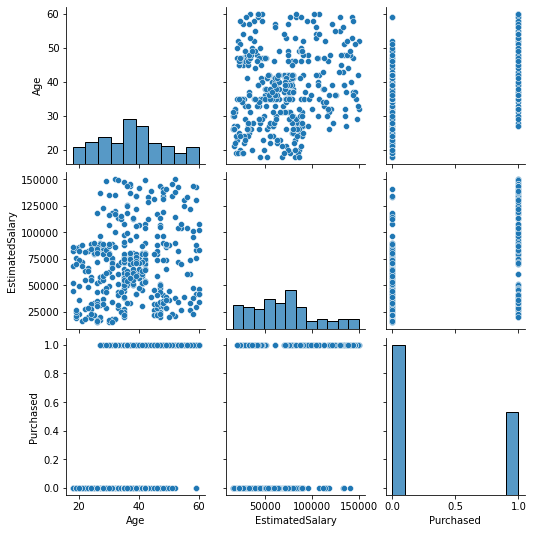

In [6]:
sns.pairplot(dataset)

In [7]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [8]:
X

array([[    19,  19000],
       [    35,  20000],
       [    26,  43000],
       [    27,  57000],
       [    19,  76000],
       [    27,  58000],
       [    27,  84000],
       [    32, 150000],
       [    25,  33000],
       [    35,  65000],
       [    26,  80000],
       [    26,  52000],
       [    20,  86000],
       [    32,  18000],
       [    18,  82000],
       [    29,  80000],
       [    47,  25000],
       [    45,  26000],
       [    46,  28000],
       [    48,  29000],
       [    45,  22000],
       [    47,  49000],
       [    48,  41000],
       [    45,  22000],
       [    46,  23000],
       [    47,  20000],
       [    49,  28000],
       [    47,  30000],
       [    29,  43000],
       [    31,  18000],
       [    31,  74000],
       [    27, 137000],
       [    21,  16000],
       [    28,  44000],
       [    27,  90000],
       [    35,  27000],
       [    33,  28000],
       [    30,  49000],
       [    26,  72000],
       [    27,  31000],


In [9]:
y

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,

In [4]:
dataset["Purchased"].unique()

array([0, 1], dtype=int64)

In [11]:
dataset['Purchased'].value_counts()

0    257
1    143
Name: Purchased, dtype: int64

## Splitting the dataset into the Training set and Test set

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 10)

In [13]:
print(X_train)

[[    28  79000]
 [    28  85000]
 [    41  72000]
 [    60  34000]
 [    46  82000]
 [    47  34000]
 [    33  69000]
 [    26  15000]
 [    36 144000]
 [    35  38000]
 [    31  18000]
 [    52 114000]
 [    34  43000]
 [    25  80000]
 [    53  72000]
 [    45  26000]
 [    37  53000]
 [    60 102000]
 [    32 117000]
 [    42  80000]
 [    49  36000]
 [    47  20000]
 [    50  36000]
 [    35  77000]
 [    31  58000]
 [    42  64000]
 [    43 129000]
 [    45  22000]
 [    29  43000]
 [    58  95000]
 [    41  51000]
 [    35  97000]
 [    29  75000]
 [    40  57000]
 [    41  30000]
 [    57  74000]
 [    45  32000]
 [    33  28000]
 [    35 147000]
 [    35  61000]
 [    39  73000]
 [    49  89000]
 [    48  30000]
 [    51 146000]
 [    27  96000]
 [    54 104000]
 [    35  27000]
 [    41  72000]
 [    48  29000]
 [    46  96000]
 [    40  61000]
 [    26  86000]
 [    27  58000]
 [    34  72000]
 [    58  38000]
 [    47  51000]
 [    55 125000]
 [    19  21000]
 [    51  2300

In [14]:
print(y_train)

[0 0 0 1 0 1 0 0 1 0 0 0 0 0 1 1 0 1 0 0 1 1 1 0 0 0 1 1 0 1 0 1 0 0 0 1 1
 0 1 0 0 1 1 1 1 1 0 0 1 0 0 0 0 0 1 1 1 0 1 1 0 1 1 0 0 0 0 1 0 0 1 0 0 0
 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 1 0 0 1 0 1 0 0 1 1 0 0 0 0 0 1 1 0
 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 1 0 0 0 1 0 1 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0
 0 1 0 1 1 1 0 0 0 0 1 0 0 1 0 1 1 1 0 0 1 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 1
 1 0 0 1 1 0 0 1 1 0 0 0 1 1 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1
 0 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 1 0 0 1 0 0 1 0 1 1 1
 1 1 1 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 1 0 1 1 1 1 0 0 0 0 1 1 0 0 1
 1 0 0 1]


In [15]:
print(X_test)

[[    42  65000]
 [    37  71000]
 [    42  90000]
 [    47  47000]
 [    23  48000]
 [    58  23000]
 [    39  42000]
 [    47  43000]
 [    35  59000]
 [    39  71000]
 [    41  59000]
 [    26 118000]
 [    59 130000]
 [    57  26000]
 [    46  23000]
 [    38  71000]
 [    28  87000]
 [    24  58000]
 [    30  15000]
 [    39 122000]
 [    27  54000]
 [    21  72000]
 [    37  75000]
 [    59  88000]
 [    58  47000]
 [    37  55000]
 [    38  59000]
 [    37 146000]
 [    48  33000]
 [    36  33000]
 [    35  20000]
 [    27  84000]
 [    33  43000]
 [    49  28000]
 [    48 119000]
 [    34  43000]
 [    46  88000]
 [    40 142000]
 [    40  47000]
 [    28  59000]
 [    41  45000]
 [    45  45000]
 [    24  19000]
 [    30  49000]
 [    36  63000]
 [    33  31000]
 [    48 134000]
 [    39  42000]
 [    37  80000]
 [    20  86000]
 [    28 123000]
 [    36 126000]
 [    47  50000]
 [    35  73000]
 [    42  53000]
 [    37  77000]
 [    48  90000]
 [    26  81000]
 [    52  3800

In [16]:
print(y_test)

[0 0 1 0 0 1 0 0 0 0 0 0 1 1 1 0 0 0 0 1 0 0 0 1 1 0 0 1 1 0 0 0 0 1 1 0 1
 1 0 0 0 1 0 0 0 0 1 0 0 0 1 1 1 0 0 0 1 0 1 1 0 1 0 1 1 0 0 1 0 0 0 1 0 0
 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0]


## Feature Scaling

In [17]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [18]:
print(X_train)

[[-9.38945183e-01  2.60499518e-01]
 [-9.38945183e-01  4.33270017e-01]
 [ 3.17707601e-01  5.89339367e-02]
 [ 2.15435398e+00 -1.03527922e+00]
 [ 8.01035595e-01  3.46884767e-01]
 [ 8.97701194e-01 -1.03527922e+00]
 [-4.55617189e-01 -2.74513125e-02]
 [-1.13227638e+00 -1.58238580e+00]
 [-1.65620393e-01  2.13217992e+00]
 [-2.62285991e-01 -9.20098888e-01]
 [-6.48948387e-01 -1.49600055e+00]
 [ 1.38102919e+00  1.26832743e+00]
 [-3.58951590e-01 -7.76123472e-01]
 [-1.22894198e+00  2.89294601e-01]
 [ 1.47769479e+00  5.89339367e-02]
 [ 7.04369997e-01 -1.26563988e+00]
 [-6.89547938e-02 -4.88172642e-01]
 [ 2.15435398e+00  9.22786429e-01]
 [-5.52282788e-01  1.35471267e+00]
 [ 4.14373200e-01  2.89294601e-01]
 [ 1.09103239e+00 -9.77689054e-01]
 [ 8.97701194e-01 -1.43841038e+00]
 [ 1.18769799e+00 -9.77689054e-01]
 [-2.62285991e-01  2.02909352e-01]
 [-6.48948387e-01 -3.44197226e-01]
 [ 4.14373200e-01 -1.71426728e-01]
 [ 5.11038799e-01  1.70025367e+00]
 [ 7.04369997e-01 -1.38082022e+00]
 [-8.42279584e-01 -7

In [19]:
print(X_test)

[[ 0.4143732  -0.14263164]
 [-0.06895479  0.03013885]
 [ 0.4143732   0.57724543]
 [ 0.89770119 -0.66094314]
 [-1.42227318 -0.63214806]
 [ 1.96102278 -1.35202513]
 [ 0.1243764  -0.80491856]
 [ 0.89770119 -0.77612347]
 [-0.26228599 -0.31540214]
 [ 0.1243764   0.03013885]
 [ 0.3177076  -0.31540214]
 [-1.13227638  1.38350776]
 [ 2.05768838  1.72904875]
 [ 1.86435718 -1.26563988]
 [ 0.8010356  -1.35202513]
 [ 0.0277108   0.03013885]
 [-0.93894518  0.49086018]
 [-1.32560758 -0.34419723]
 [-0.74561399 -1.5823858 ]
 [ 0.1243764   1.49868809]
 [-1.03561078 -0.45937756]
 [-1.61560437  0.05893394]
 [-0.06895479  0.14531919]
 [ 2.05768838  0.51965527]
 [ 1.96102278 -0.66094314]
 [-0.06895479 -0.43058248]
 [ 0.0277108  -0.31540214]
 [-0.06895479  2.18977008]
 [ 0.99436679 -1.0640743 ]
 [-0.16562039 -1.0640743 ]
 [-0.26228599 -1.43841038]
 [-1.03561078  0.40447493]
 [-0.45561719 -0.77612347]
 [ 1.09103239 -1.20804972]
 [ 0.99436679  1.41230284]
 [-0.35895159 -0.77612347]
 [ 0.8010356   0.51965527]
 

## Training the Logistic Regression model on the Training set

In [20]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 10)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=10)

## Predicting a new result

In [21]:
print(classifier.predict(sc.transform([[30,87000]])))

[0]


## Predicting the Test set results

In [22]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]]


In [23]:
df = pd.DataFrame()
df["Actual Value"]= y_test
df['Predicted Value']= y_pred
df

,Actual Value,Predicted Value
0,0,0
1,0,0
2,1,1
3,0,1
4,0,0
...,...,...
95,0,0
96,1,1
97,0,0
98,0,0


In [28]:
#evaluate model
print("Co-effi : ", classifier.coef_)

Co-effi :  [[2.16380739 1.04956185]]


In [30]:
from sklearn.metrics import confusion_matrix, accuracy_score,recall_score
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix: ",cm)
ac = accuracy_score(y_test, y_pred)
print(" Test Accuracy: ",ac)


Confusion Matrix:  [[64  5]
 [ 5 26]]
 Training Accuracy:  0.9


## Making the Confusion Matrix

<AxesSubplot:>

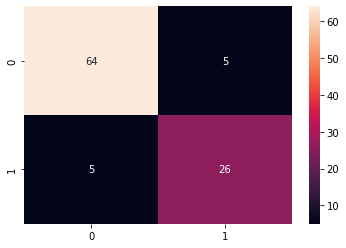

In [31]:
sns.heatmap(cm, annot= True)

In [35]:
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        69
           1       0.84      0.84      0.84        31

    accuracy                           0.90       100
   macro avg       0.88      0.88      0.88       100
weighted avg       0.90      0.90      0.90       100



In [33]:
#Evaluating the training data
predict_y_train = classifier.predict(X_train)
from sklearn.metrics import confusion_matrix, accuracy_score,recall_score
cm = confusion_matrix(y_train, predict_y_train)
print("Confusion Matrix: ",cm)
ac = accuracy_score(y_train, predict_y_train)
print(" Training Accuracy: ",ac)


Confusion Matrix:  [[171  17]
 [ 32  80]]
 Training Accuracy:  0.8366666666666667


<AxesSubplot:>

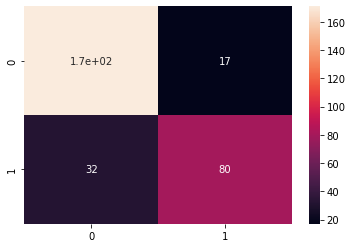

In [34]:
sns.heatmap(cm, annot= True)

In [36]:
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score
print(classification_report(y_train, predict_y_train))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87       188
           1       0.82      0.71      0.77       112

    accuracy                           0.84       300
   macro avg       0.83      0.81      0.82       300
weighted avg       0.84      0.84      0.83       300



In [38]:
y_predict = classifier.predict_proba(X_test)
y_predict

array([[0.55254283, 0.44745717],
       [0.74563112, 0.25436888],
       [0.36711691, 0.63288309],
       [0.42778879, 0.57221121],
       [0.99097666, 0.00902334],
       [0.13396249, 0.86603751],
       [0.82252636, 0.17747364],
       [0.45760462, 0.54239538],
       [0.86488188, 0.13511812],
       [0.6586118 , 0.3413882 ],
       [0.64598779, 0.35401221],
       [0.87608033, 0.12391967],
       [0.00492099, 0.99507901],
       [0.14831614, 0.85168386],
       [0.65557141, 0.34442859],
       [0.703971  , 0.296029  ],
       [0.92232625, 0.07767375],
       [0.98504275, 0.01495725],
       [0.9856853 , 0.0143147 ],
       [0.29230421, 0.70769579],
       [0.9754187 , 0.0245813 ],
       [0.98777383, 0.01222617],
       [0.72203063, 0.27796937],
       [0.01729352, 0.98270648],
       [0.0696744 , 0.9303256 ],
       [0.82620996, 0.17379004],
       [0.77363412, 0.22636588],
       [0.23304062, 0.76695938],
       [0.48077618, 0.51922382],
       [0.91931348, 0.08068652],
       [0.

In [40]:
y_predict = classifier.predict_proba(X_test)[:,1]
y_predict

array([0.44745717, 0.25436888, 0.63288309, 0.57221121, 0.00902334,
       0.86603751, 0.17747364, 0.54239538, 0.13511812, 0.3413882 ,
       0.35401221, 0.12391967, 0.99507901, 0.85168386, 0.34442859,
       0.296029  , 0.07767375, 0.01495725, 0.0143147 , 0.70769579,
       0.0245813 , 0.01222617, 0.27796937, 0.98270648, 0.9303256 ,
       0.17379004, 0.22636588, 0.76695938, 0.51922382, 0.08068652,
       0.04586468, 0.05873361, 0.05961789, 0.53369581, 0.93559818,
       0.07248261, 0.78931875, 0.84525103, 0.23626233, 0.03487108,
       0.26414006, 0.45316338, 0.00465033, 0.03899694, 0.17852263,
       0.0422494 , 0.9580884 , 0.17747364, 0.30928897, 0.01509875,
       0.19998603, 0.59329675, 0.59424574, 0.19257997, 0.36040269,
       0.29026195, 0.85810021, 0.0441906 , 0.74358908, 0.9966725 ,
       0.04302982, 0.8787806 , 0.18683257, 0.75598219, 0.99052147,
       0.69839322, 0.44745717, 0.9916116 , 0.00227856, 0.35565348,
       0.26014342, 0.52459052, 0.01824425, 0.03487108, 0.08423

In [54]:
def converZeroToOne(values,threshold = 0.5):
    if(values>threshold): 
        return 1
    else:
        return 0

In [55]:
df = pd.DataFrame()
df["Actual Value"]= y_test
df['Predicted Value']= y_pred
df.head(30)

,Actual Value,Predicted Value
0,0,0
1,0,0
2,1,1
3,0,1
4,0,0
5,1,1
6,0,0
7,0,1
8,0,0
9,0,0


In [56]:
df["Predicted Value"]=df['Predicted Value'].apply(converZeroToOne)

In [57]:
df.head(30)

,Actual Value,Predicted Value
0,0,0
1,0,0
2,1,1
3,0,1
4,0,0
5,1,1
6,0,0
7,0,1
8,0,0
9,0,0


In [41]:
from sklearn.metrics import classification_report
target_name = ['age', 'salary']

In [42]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        69
           1       0.84      0.84      0.84        31

    accuracy                           0.90       100
   macro avg       0.88      0.88      0.88       100
weighted avg       0.90      0.90      0.90       100



NameError: name 'roc_auc' is not defined

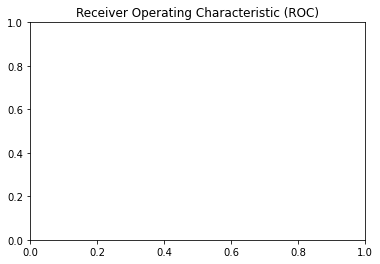

In [43]:
from sklearn.metrics import roc_auc_score, auc, roc_curve
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_score)
plt.title("Receiver Operating Characteristic (ROC)")
roc_auc= auc(false_positive_rate,true_positive_rate,'b',label= "AUC=%f"%roc_auc)
plt.legend(loc ='lower right')
plt.plot([0,1], ls ="--")
plt.plot([0,0],[1,0], c= ".7")
plt.plot([1,1], c=".7")
plt.ylabel("True Positive Rate (TPR = TP/TP=TP/(TP+FN))")
plt.xlabel("False Positive Rate (FPR = FP/N=FP/(FP+TN))")
plt.show

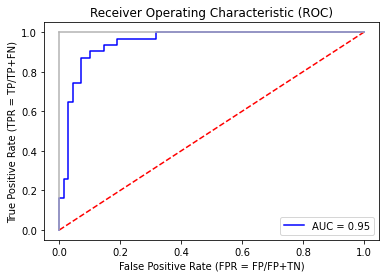

In [44]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, auc, roc_curve
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

# Assuming you have defined `y_test` and `y_score` appropriately

false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_score)
roc_auc = roc_auc_score(y_test, y_score)

plt.title("Receiver Operating Characteristic (ROC)")
plt.plot(false_positive_rate, true_positive_rate, 'b', label="AUC = %0.2f" % roc_auc)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.plot([0, 0], [1, 0], c=".7")
plt.plot([1, 1], c=".7")
plt.ylabel("True Positive Rate (TPR = TP/TP+FN)")
plt.xlabel("False Positive Rate (FPR = FP/FP+TN)")
plt.show()


In [45]:
print("Estimate Intercept: ", classifier.intercept_)

Estimate Intercept:  [-0.9578732]


In [46]:
print("Number of Coefficient : ", len(classifier.coef_))
print("Coficients : ", classifier.coef_)


Number of Coefficient :  1
Coficients :  [[2.16380739 1.04956185]]


In [47]:
import statsmodels.api as sm

In [48]:
model = sm.Logit(y_train, X_train)

In [49]:
output = model.fit()

Optimization terminated successfully.
         Current function value: 0.420563
         Iterations 7


In [50]:
print(output.summary2())

                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.363     
Dependent Variable: y                AIC:              256.3380  
Date:               2023-06-15 10:57 BIC:              263.7456  
No. Observations:   300              Log-Likelihood:   -126.17   
Df Model:           1                LL-Null:          -198.21   
Df Residuals:       298              LLR p-value:      3.4032e-33
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     7.0000                                       
--------------------------------------------------------------------
          Coef.     Std.Err.      z       P>|z|     [0.025    0.975]
--------------------------------------------------------------------
x1        1.9912      0.2474    8.0478    0.0000    1.5063    2.4762
x2        0.9959      0.1924    5.1763    0.0000    0.6188    1.3730



## Visualising the Training set results

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


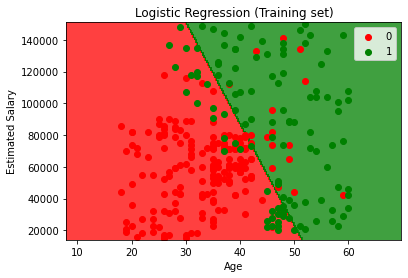

In [26]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

## Visualising the Test set results

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


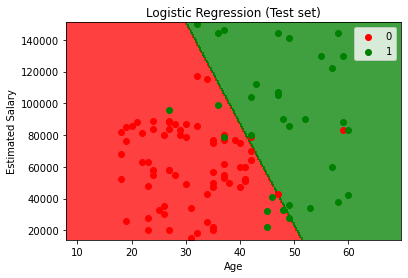

In [27]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()